# Testing Clustering ML models with Data Sets

## Base:

Read the data

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
# dataset = pd.read_csv(<PATH>)
dataset = pd.read_csv('../../DataSets/Mall_Customers.csv')

In [5]:
# Check data
dataset.head(3)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [6]:
# Transoforming all data into numeric
from sklearn.preprocessing import LabelEncoder
n_columns = dataset.shape[1]
columns = dataset.columns[1::]
encoders = [ LabelEncoder() for _ in range(n_columns - 1)]

In [7]:
prepross_data = dataset.copy()

In [8]:
i = 0
for column in columns:
    prepross_data[column] = encoders[i].fit_transform(dataset[column])
    i += 1

In [9]:
prepross_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,1,0,30
1,2,1,3,0,67
2,3,0,2,1,4
3,4,0,5,1,64
4,5,0,13,2,31


In [10]:
X = prepross_data.iloc[:, 1:].values
X


array([[ 1,  1,  0, 30],
       [ 1,  3,  0, 67],
       [ 0,  2,  1,  4],
       [ 0,  5,  1, 64],
       [ 0, 13,  2, 31],
       [ 0,  4,  2, 63],
       [ 0, 17,  3,  4],
       [ 0,  5,  3, 79],
       [ 1, 44,  4,  1],
       [ 0, 12,  4, 59],
       [ 1, 47,  4, 12],
       [ 0, 17,  4, 83],
       [ 0, 40,  5, 13],
       [ 0,  6,  5, 64],
       [ 1, 19,  5, 11],
       [ 1,  4,  5, 66],
       [ 0, 17,  6, 28],
       [ 1,  2,  6, 55],
       [ 1, 34,  7, 24],
       [ 0, 17,  7, 82],
       [ 1, 17,  8, 28],
       [ 1,  7,  8, 60],
       [ 0, 28,  9,  3],
       [ 1, 13,  9, 60],
       [ 0, 36, 10, 12],
       [ 1, 11, 10, 68],
       [ 0, 27, 10, 26],
       [ 1, 17, 10, 52],
       [ 0, 22, 11, 25],
       [ 0,  5, 11, 72],
       [ 1, 42, 12,  2],
       [ 0,  3, 12, 60],
       [ 1, 35, 13,  2],
       [ 1,  0, 13, 77],
       [ 0, 31, 13, 12],
       [ 0,  3, 13, 67],
       [ 0, 24, 14, 15],
       [ 0, 12, 14, 60],
       [ 0, 18, 15, 21],
       [ 0,  2, 15, 62],


Time for the model and ...

In [9]:
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
import sklearn.model_selection as training
import sklearn.metrics as metrics
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import silhouette_visualizer

C:\Users\MrJel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\MrJel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\MrJel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\MrJel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

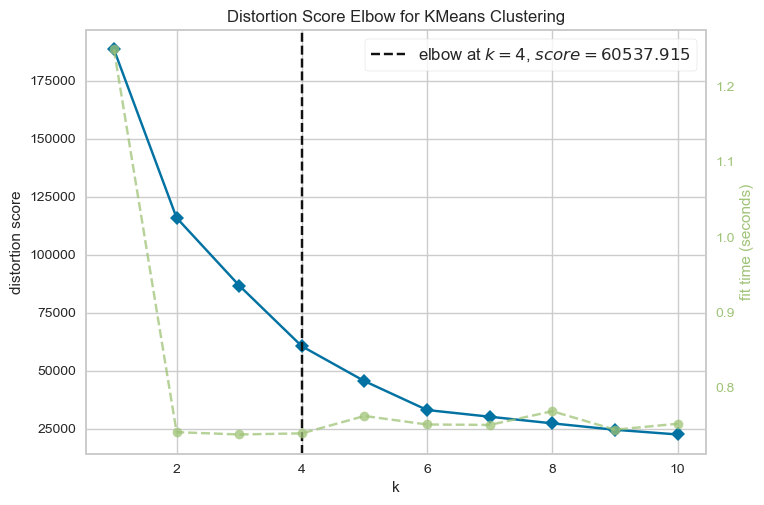

In [10]:
kmeans = cluster.KMeans()
visualizer = KElbowVisualizer(kmeans, k = (1, 11))
visualizer.fit(X)
visualizer.show()
plt.show()

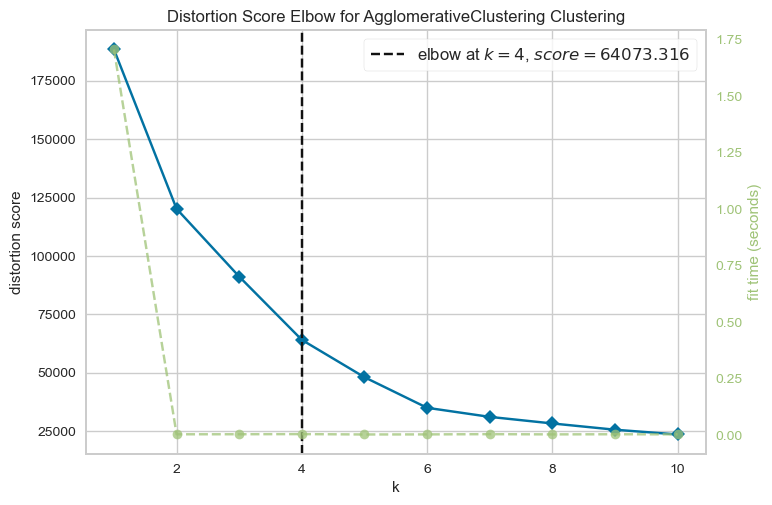

In [11]:
hc  = cluster.AgglomerativeClustering()
visualizer = KElbowVisualizer(hc, k = (1, 11))
visualizer.fit(X)
visualizer.show()
plt.show()

In [12]:
n_clus = 4

kmeans = cluster.KMeans(n_clusters = n_clus)
y_kmeans = kmeans.fit_predict(X)

C:\Users\MrJel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\MrJel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [13]:
hc = cluster.AgglomerativeClustering(n_clusters = n_clus)
y_hc = hc.fit_predict(X)

In [14]:
prepross_data['Label'] = y_kmeans
prepross_data.head()



,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Label
0,1,1,1,0,30,0
1,2,1,3,0,67,0
2,3,0,2,1,4,3
3,4,0,5,1,64,0
4,5,0,13,2,31,0


Metrics

In [15]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

In [16]:
# Best : near 1;  Worst: near -1;   Overlapping: near 0
silhoutte_kmeans = silhouette_score(X, y_kmeans)

silhoutte_hc = silhouette_score(X, y_hc)

print('silhoutte kmeans :', silhoutte_kmeans)
print('silhoutte hc', silhoutte_hc)

silhoutte kmeans : 0.41836163102646284
silhoutte hc 0.40113113035937104


In [17]:

calinski_harabasz_kmeans = silhouette_score(X, y_kmeans)

calinski_harabasz_hc = silhouette_score(X, y_hc)

print('calinski harabasz kmeans:', calinski_harabasz_kmeans)
print('calinski harabasz hc', calinski_harabasz_hc)

calinski harabasz kmeans: 0.41836163102646284
calinski harabasz hc 0.40113113035937104
